In [152]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load and preprocess data

In [153]:
data_path = r'C:\Users\agkal\Downloads\mlp_regression_data (1).csv'
data = pd.read_csv(data_path)
X = data[['x']].values
y = data['y'].values.reshape(-1, 1)

# Normalize data

In [154]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_normalized = scaler_X.fit_transform(X)
y_normalized = scaler_y.fit_transform(y)

# Convert to tensors

In [155]:
X_train = torch.tensor(X_normalized, dtype=torch.float32)
y_train = torch.tensor(y_normalized, dtype=torch.float32)

# MLP Class for Regression

In [156]:
class MLPRegression(nn.Module):
    def __init__(self, num_features):
        super(MLPRegression, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(num_features, 50),
            nn.ReLU(),
            nn.Linear(50, 25),
            nn.ReLU(),
            nn.Linear(25, 1)
        )

    def forward(self, x):
        return self.network(x)

# Dataset class

In [157]:
class RegressionDataset(Dataset):
    def __init__(self, features, targets):
        self.features = features
        self.targets = targets

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.targets[idx]

In [158]:
dataset = RegressionDataset(X_train, y_train)
train_loader = DataLoader(dataset=dataset, batch_size=32, shuffle=True)

In [159]:
model = MLPRegression(num_features=1)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training Loop

In [160]:
epochs = 100
epoch_losses = []

for epoch in range(epochs):
    model.train()
    batch_losses = []
    for batch_idx, (features, targets) in enumerate(train_loader):
        optimizer.zero_grad()
        predictions = model(features)
        loss = criterion(predictions, targets)
        loss.backward()
        optimizer.step()
        batch_losses.append(loss.item())
    
    epoch_loss = sum(batch_losses) / len(batch_losses)
    epoch_losses.append(epoch_loss)
    print(f'Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}')

Epoch 1/100, Loss: 0.9961
Epoch 2/100, Loss: 0.8822
Epoch 3/100, Loss: 0.8570
Epoch 4/100, Loss: 0.8287
Epoch 5/100, Loss: 0.8503
Epoch 6/100, Loss: 0.8283
Epoch 7/100, Loss: 0.8018
Epoch 8/100, Loss: 0.7943
Epoch 9/100, Loss: 0.7817
Epoch 10/100, Loss: 0.7694
Epoch 11/100, Loss: 0.7654
Epoch 12/100, Loss: 0.7555
Epoch 13/100, Loss: 0.7493
Epoch 14/100, Loss: 0.7330
Epoch 15/100, Loss: 0.7402
Epoch 16/100, Loss: 0.7542
Epoch 17/100, Loss: 0.7086
Epoch 18/100, Loss: 0.7554
Epoch 19/100, Loss: 0.7133
Epoch 20/100, Loss: 0.6822
Epoch 21/100, Loss: 0.6723
Epoch 22/100, Loss: 0.6688
Epoch 23/100, Loss: 0.6725
Epoch 24/100, Loss: 0.6447
Epoch 25/100, Loss: 0.6320
Epoch 26/100, Loss: 0.6136
Epoch 27/100, Loss: 0.6134
Epoch 28/100, Loss: 0.5969
Epoch 29/100, Loss: 0.5887
Epoch 30/100, Loss: 0.5624
Epoch 31/100, Loss: 0.5700
Epoch 32/100, Loss: 0.5465
Epoch 33/100, Loss: 0.5672
Epoch 34/100, Loss: 0.5229
Epoch 35/100, Loss: 0.5112
Epoch 36/100, Loss: 0.5178
Epoch 37/100, Loss: 0.4952
Epoch 38/1

# Plot training loss

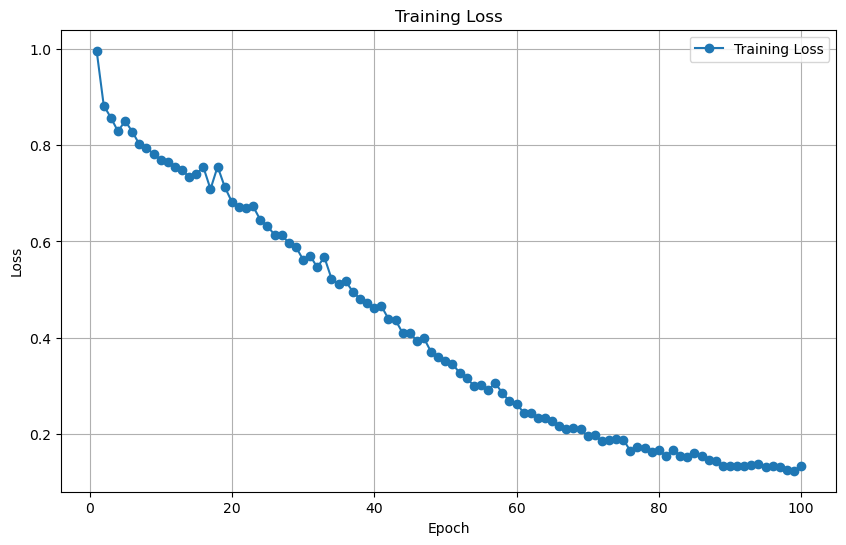

In [161]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs+1), epoch_losses, marker='o', label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss as a Function of Training Epochs')
plt.legend()
plt.grid(True)
plt.show()

# Plot regression curve

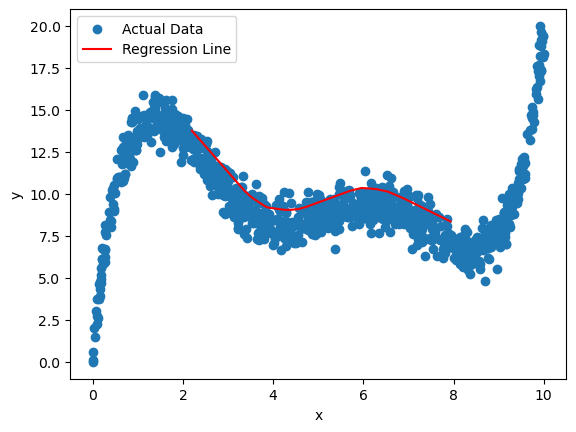

In [162]:
model.eval()
with torch.no_grad():
    x_values = torch.linspace(-1, 1, steps=1000).view(-1, 1)
    predicted = model(x_values)
    predicted_np = scaler_y.inverse_transform(predicted.numpy())

plt.scatter(X, y, label='Actual Data')
plt.plot(scaler_X.inverse_transform(x_values.numpy()), predicted_np, color='red', label='Regression Line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()